In [1]:
import pickle 
import glob
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

random_state = 1

# ファイル読み込み
with open('../../data/Hazumi_features/Hazumi1911_features_self.pkl', mode='rb') as f:
    SS, SS_ternary, SP, SP_binary, SP_cluster, text, audio, visual, vid= pickle.load(f, encoding='utf-8')

with open('../../data/Hazumi_features/Hazumi1911_features.pkl', mode='rb') as f:
    TS, TS_ternary, TP, TP_binary, TP_cluster, text, audio, visual, vid= pickle.load(f, encoding='utf-8')

In [2]:
def show_boxplot(df):
    df0 = df[df['cluster']==0].iloc[:,:-1]
    df1 = df[df['cluster']==1].iloc[:,:-1]
    df2 = df[df['cluster']==2].iloc[:,:-1]
    df3 = df[df['cluster']==3].iloc[:,:-1]

    # fig = plt.figure(figsize=(15,5), facecolor='lightblue')
    # ax0 = fig.add_subplot(1, 4, 1)
    # ax1 = fig.add_subplot(1, 4, 2)
    # ax2 = fig.add_subplot(1, 4, 3)
    # ax3 = fig.add_subplot(1, 4, 4)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15, 5))
    
    ax0.set_xticklabels(columns)
    ax1.set_xticklabels(columns)
    ax2.set_xticklabels(columns)
    ax3.set_xticklabels(columns)

    ax0.set_title(f'class0 (データ数:{len(df0)})')
    ax1.set_title(f'class1 (データ数:{len(df1)})')
    ax2.set_title(f'class2 (データ数:{len(df2)})')
    ax3.set_title(f'class3 (データ数:{len(df3)})')

    ax0.boxplot(df0)
    ax1.boxplot(df1)
    ax2.boxplot(df2)
    ax3.boxplot(df3)

    ax0.axhline(0, linestyle='--', color='red')
    ax1.axhline(0, linestyle='--', color='red')
    ax2.axhline(0, linestyle='--', color='red')
    ax3.axhline(0, linestyle='--', color='red')

    plt.show()

/tmp/ipykernel_24443/338396249.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(columns)
/tmp/ipykernel_24443/338396249.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(columns)
/tmp/ipykernel_24443/338396249.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(columns)
/tmp/ipykernel_24443/338396249.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(columns)


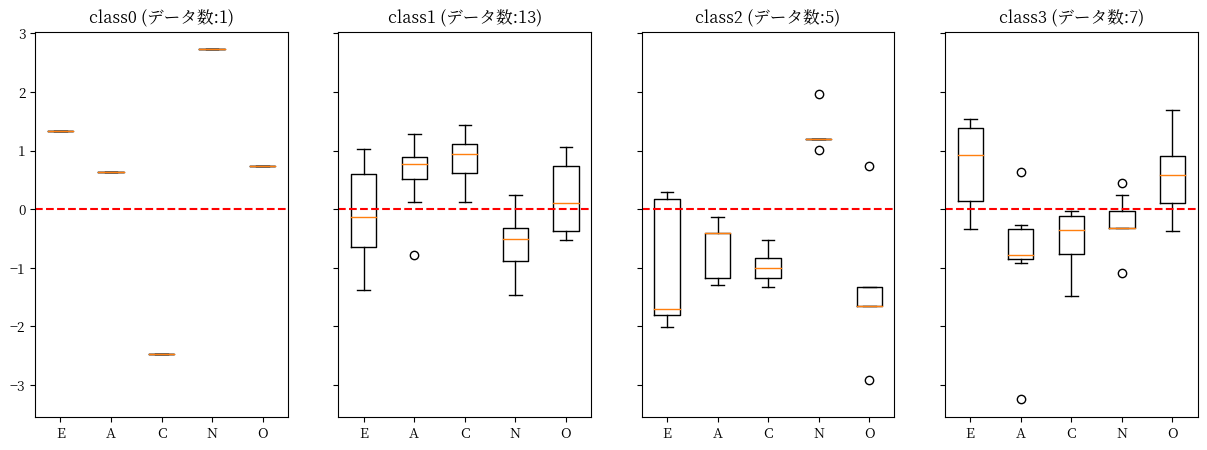

In [7]:
# 第三者アノテーションBig5スコア
columns = ['E', 'A', 'C', 'N', 'O']
df = pd.DataFrame.from_dict(TP, orient='index', columns=columns)
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

model = KMeans(n_clusters=4, random_state=random_state) 
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster
show_boxplot(df)

/tmp/ipykernel_24443/338396249.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(columns)
/tmp/ipykernel_24443/338396249.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(columns)
/tmp/ipykernel_24443/338396249.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(columns)
/tmp/ipykernel_24443/338396249.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(columns)


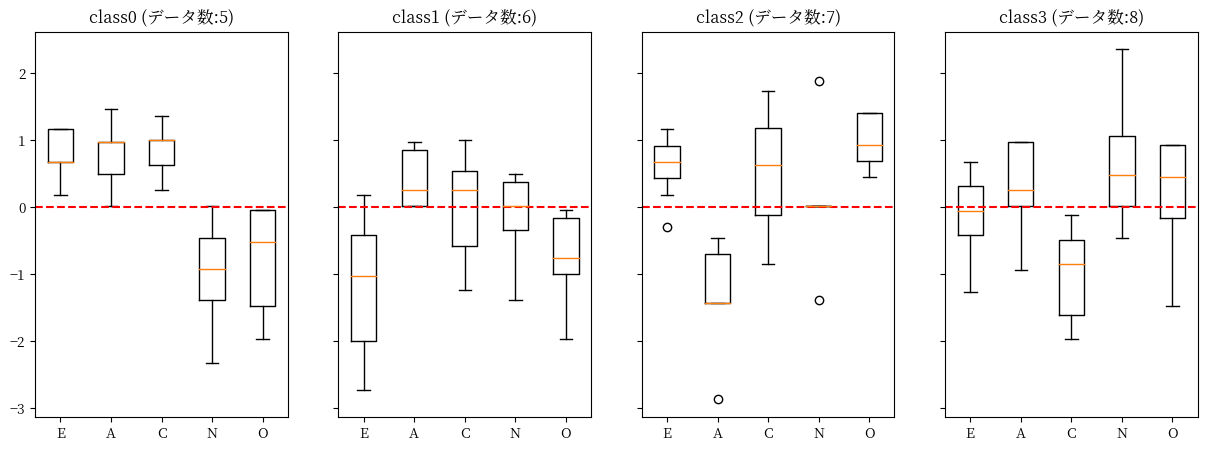

In [6]:
# 本人アノテーションBig5スコア
columns = ['E', 'A', 'C', 'N', 'O']
df = pd.DataFrame.from_dict(SP, orient='index', columns=columns)
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

model = KMeans(n_clusters=4, random_state=random_state) 
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster
show_boxplot(df)

In [19]:
# 心象：本人, 性格特性：本人
results = [0, 0, 0, 0]
for v in vid:
    results[SP_cluster[v]] += sum(SS[v]) / len(SS[v])

counts = [5,6,7,8]
for i, count in enumerate(counts):
    results[i] /= count
results

[4.7387740107671386, 4.728559319946804, 4.297769882704896, 4.341148784851116]

In [22]:
# 心象：第三者，性格特性：本人
results = [0, 0, 0, 0]
for v in vid:
    results[SP_cluster[v]] += sum(TS[v]) / len(TS[v])

counts = [5,6,7,8]
for i, count in enumerate(counts):
    results[i] /= count
results

[4.9008234034007225, 4.699832775941341, 4.654676366772472, 4.6391269612924075]

In [24]:
# 心象：本人，性格特性：第三者
results = [0, 0, 0, 0]
for v in vid:
    results[TP_cluster[v]] += sum(SS[v]) / len(SS[v])

counts = [1, 13, 5, 7]
for i, count in enumerate(counts):
    results[i] /= count
results

[4.661971830985915, 4.5876359544321925, 4.147283741661536, 4.548735354906802]

In [25]:
# 心象：第三者，性格特性：第三者
results = [0, 0, 0, 0]
for v in vid:
    results[TP_cluster[v]] += sum(TS[v]) / len(TS[v])

counts = [1, 13, 5, 7]
for i, count in enumerate(counts):
    results[i] /= count
results

[4.898591549295774, 4.78723763811122, 4.515011312079439, 4.670160932179916]